<h1 style="text-align:center;">DRUGI PROJEKAT</h1>

<h2 style="font-style:italic; font-weight:bold; text-align: center;">
    Online Retail & E-Commerce Dataset
</h2>


## 1. Uvod u klasterizaciju (nenagledano učenje)
Klasterizacija je metoda nenagledanog učenja čiji je cilj da se podaci grupišu u homogene grupe (klastere) na osnovu njihove sličnosti, bez prethodno definisanih oznaka (labela). Za razliku od klasifikacije, gde su klase poznate unapred, u klasteizaciji algoritam sam otkriva strukturu podataka.

### Najčešće korišćeni algoritmi klasterizacije:
#### 1. K-Means
- Jedan od najpopularnijih algoritama.
- Zahteva unapred zadat broj klastera **k**.
- Cilj: minimizirati sumu kvadratnih rastojanja između tačaka i centra njihovog klastera (Within-Cluster Sum of Squares – WCSS).
- Prednosti: brz, jednostavan, dobro radi na velikim skupovima.
- Mana: osetljiv na outliere i zahteva unapred definisan broj klastera

#### 2. Hierarchical Clustering (Hijerarhijska  klasterizacija)
- Gradi hijerarhiju klastera (stablo - dendrogram).
- Ne zahteva unapred zadat broj klastera.
- Može biti:
  - aglomerativna (spajanje klastera)
  - divisivna (razdvajanje klastera)

#### 3. DBSCAN
- Ne zahteva broj klastera unapred.
- Može da detektuje outliere "šum".
- Dobro radi sa klasterima proizvoljnog oblika.
- Mana: osetljiv na izbor parametara.

U ovom projektu ćemo kasnije isprobati više ovih pristupa i uporediti rezultate.

Cilj ovog projekta je da se na izabranom E-Commerce datasetu primene različiti algoritmi klasterizacije, uporede njihovi rezultai, analizira kvalitet dobijenih klastera, kao i da se razmotre tehnike pripreme podataka, redukcije dimenzionalnosti i obrade outliera.

U kontekstu e-commerce podataka, klasterizacija se može koristiti za segmentaciju kupaca, analizu ponašanja potrošača ili identifikaciju sličnih transakcija.

U ovom projektu koristićemo Python programski jezik, biblioteku scikit-learn za implementaciju algoritama klasterizacije, kao i biblioteke iz SciPy stack-a kao što su NumPy, Pandas i Matplotlib za obradu i vizualizaciju podataka.

## 2. Izbor i opis skupa podataka
Za projakat je izabran dataset: [Online Retail & E-Commerce Dataset](https://www.kaggle.com/datasets/ertugrulesol/online-retail-data)

Međutim, u ovom radu se koristi **sintetička verzija tog skupa podataka** pod nazivom `synthetic_online_retail_data.csv`.

Sintetička verzija dataseta izabrana je radi lakše obrade i fokusirana na primenu algoritama klasterizacije.

Ovaj dataset sadrži simulirane podatke o online kupovinama i pripada oblasti *E-Commerce Services*.

Dataset sadrži ukupno 1000 redova i 13 kolona. Svaki red predstavlja jednu transakciju kupovine određenog proizvoda od strane određenog kupca.

### Opis podataka:
Dataset sadrži informacije o:
- customer_id - identifikator kupca (nije feature za klasterizaciju, koristi se za grupisanje podataka)
- product_id - kategorijska promenljiva (identifikator proizvoda)
- quantity - numerička promenljiva (broj kupljenih proizvoda)
- price - numerička promenljiva (cena po jedinici) 
- review_score - numerička promenljiva (ocena proizvoda od 1 do 5)
- age - numerička promenljiva (starost kupca)

Ove karakteristike omogućavaju primenu klasterizacionih algritama za grupisanje kupaca prema njihovom ponašanju u kupovini.

### Tipovi promenljivih
Dataset sadrži sledeće tipove promenljivih:
- identifikatori: customer_id, product_id
- numeričke promenljive: quantity, price, review_score, age

### Problem koji želimo da istražimo:
Cilj projekta biće da pomoću klasterizacije 
- identifikujemo različite tipove kupaca.
- analiyiramo obrasce kupovine
- otkrijemo grupe kao što su:
  - česti kupci
  - veliki potrošači
  - povremeni kupci
  - kupci sa malim budžetom
  - ili kupci koji ostavljaju niske ocene

Pošto jedan kupac može imati više kupovina, podaci će kasnije biti agregirani na nivou kupca. Na ovaj način svaki kupac će biti predstavljen skupom karakteristika koje opisuju njegovo ukupno ponašanje u kupovini, što je pogodno za primenu klasterizacije.

## 3. Priprema podataka i deskriptivna analiza 

### Učitavanje podataka

In [1]:
import pandas as pd
#učitavanje podataka
df = pd.read_csv("synthetic_online_retail_data.csv", encoding="ISO-8859-1")
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


In [2]:
df.shape

(1000, 13)

Dataset sadrži 1000 redova i 13 kolona.

### Osnovni pregled podataka

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


Dataset sadrži 1000 zapisa (transakcija) i 13 atributa. Većina numeričkih kolona (quantity, price, age) nema nedistajučih vrednosti. Međutim, u kolonama review_score i gende postoje nedostajuće vrednosti (NaN), što zahteva dodatnu obradu pre klasterizacije.

Večina kolone su numeričke i pogodne zaklasterizaciju, dok identifikatori i tesktualne kolone neće biti direktno korišćeni kao ulaz u algoritme klasterizacije.

### Provera nedostajućih vrednosti

In [4]:
df.isnull().sum()

customer_id         0
order_date          0
product_id          0
category_id         0
category_name       0
product_name        0
quantity            0
price               0
payment_method      0
city                0
review_score      201
gender            103
age                 0
dtype: int64

Proverom nedostajučih vrednosti uočeno je da kolone review_score i gender sadrže NaN vrednosti dok ostale kolone imaju nedostajuće podatke. Zbog toga je neophodno izvršiti njihovu obradu pre primene algoritama klasterizacije.

In [5]:
df['review_score'] = df['review_score'].fillna(df['review_score'].mean())
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

Nedostajuće vrednosti u review_score su popunjene prosečnom ocenom jer to minimalno utiče na distribuciju podataka. Nedostajuće vrednosti u gender zamenjene najčešćom vrednošću (modus), što je standardna metoda za obradu nedostajućih kategorijskih podataka.

In [6]:
df.isnull().sum()

customer_id       0
order_date        0
product_id        0
category_id       0
category_name     0
product_name      0
quantity          0
price             0
payment_method    0
city              0
review_score      0
gender            0
age               0
dtype: int64

### Kreiranje nove promenljive

In [7]:
df["TotalPrice"] = df["quantity"] * df["price"]

In [8]:
df[['quantity','price','TotalPrice']].head()

,quantity,price,TotalPrice
0,2,373.36,746.72
1,5,299.34,1496.70
2,5,23.00,115.00
3,2,230.11,460.22
4,4,176.72,706.88


In [9]:
df.describe()[["quantity", "price", "TotalPrice"]]

,quantity,price,TotalPrice
count,1000.000000,1000.000000,1000.000000
mean,2.947000,251.850660,737.326880
std,1.413573,139.194688,566.404843
min,1.000000,10.720000,20.840000
25%,2.000000,128.525000,285.837500
50%,3.000000,250.220000,592.785000
75%,4.000000,366.467500,1081.040000
max,5.000000,499.500000,2437.650000


Kreirana je nova promenljiva TotalPrice koja predstavlja ukupnu vrednost jedne kupovine, dobijena množenjem količine (quantity) i cene po jedinici (price). Ova varijabla će biti korisna za analizu potrošačkog ponašanja i kasniju klasterizaciju kupaca.

### Osnovna statistika


In [10]:
df.describe()

,customer_id,product_id,category_id,quantity,price,review_score,age,TotalPrice
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55490.723000,540.726000,30.030000,2.947000,251.850660,3.992491,46.382000,737.326880
std,25910.185857,261.737704,14.370303,1.413573,139.194688,1.107783,16.569992,566.404843
min,10201.000000,100.000000,10.000000,1.000000,10.720000,1.000000,18.000000,20.840000
25%,33857.000000,311.750000,20.000000,2.000000,128.525000,3.992491,32.000000,285.837500
50%,54619.500000,542.500000,30.000000,3.000000,250.220000,4.000000,47.000000,592.785000
75%,77848.500000,770.750000,40.000000,4.000000,366.467500,5.000000,61.000000,1081.040000
max,99923.000000,995.000000,50.000000,5.000000,499.500000,5.000000,75.000000,2437.650000


Tumačenje osnovne statistike:
- `quantity` se kreće od 1 do 5, sa prosekom oko 2.95, što znači da kupci uglavnom kupuju male količine po transakciji
- `price` varira od približno 10 do 500, što ukazuje na širok raspon cena proizvoda
- `review_score` ima vrednosti od 1 do 5, sa prosekom 4, što sugeriše da su kupci uglavnom zadovoljni
- `age` kupaca se kreće od 18 do 75 godina, sa prosekom oko 46, što pokazuje da dataset obuhvata širok raspon starosnih grupa"
- `TotalPrice` varira od oko 20 do 2437, što pokazuje da postoje i mali i veoma veliki izdaci po kupovini.

Velika standardna devijacija u TotalPrice ukazuje na značajne razlike u ponašanju kupaca, što potvrđuje potrebu za klasterizacijom.

### Vizuelizacija distribucije potrošnje

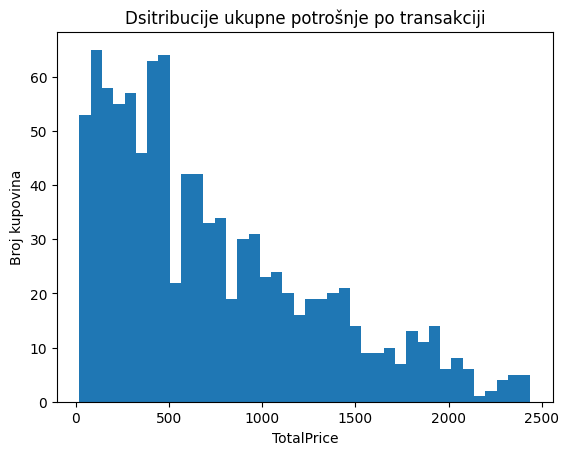

In [11]:
import matplotlib.pyplot as plt

plt.hist(df["TotalPrice"], bins = 40)
plt.title("Dsitribucije ukupne potrošnje po transakciji")
plt.xlabel("TotalPrice")
plt.ylabel("Broj kupovina")
plt.show()

Tumačenje distribucije TotalPrice:
- Distribucija ukuone potrošnje po transakciji je desno asimetrična što znači da većina kupovina ima manju vrednost, dok postoji manji broj veoma skupoh transakcija.
- Najveći broj transakcija se nalazi u opsegu približno 0-500
- Kako TotalPrice raste, broj transakcija opada, što ukazuje na postojanje potencijalnih outliera (izuzetno visokih vrednosti potrošnje).

Desna asimetrije distribucije je tipična za e-commerce podatke.

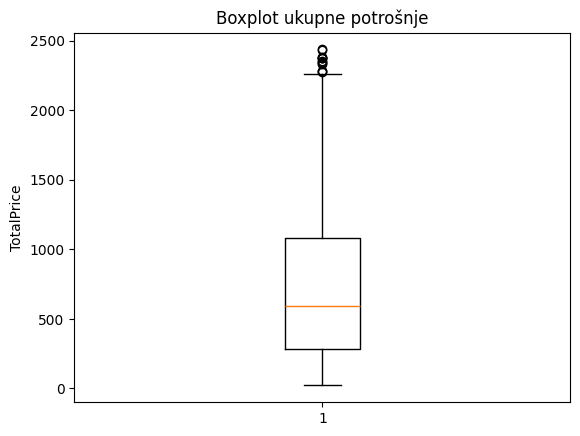

In [12]:
plt.boxplot(df["TotalPrice"])
plt.title("Boxplot ukupne potrošnje")
plt.ylabel("TotalPrice")
plt.show()

Boxplot pokazuje prisustvo nekoliko ekstremnih vrednosti TotalPrice, što potvrđuje postojanje outliera u podacima.

Outlieri mogu negativno uticati na algoritamske klasterizacije kao što su K-Means, zbog čega će njihova obrada biti analizirana u kasnijem delu projekta.

### Zaključak pripreme podataka
Nakon pregleda i analize podataka:
- Nema kritičnih nedostajučih vrednosti.
- Kreirana je nova promenljiva **TotalPrice = quantity * price**, koja bolje opisuje potrošnju po transakciji
- Vizuelizacija podataka (histogrami i boxplot) ukazala je na postojanje potencijalnih outliera u ukupnoj potrošnji
- Podaci su spremni za agregaciju po kupcu i klasterizaciju.

U narednom koraku ćemo: 
- grupisati podatke po kupcu
- skalirati ih
- i primeniti algoritme za klasterizaciju

### Izbor karakteristika za klasterizaciju
Za potrebe klasterizacije, fokusiraćemo se na numeričke karakteristike koje opisuju ponašanje kupaca, kao što su:
- quantity
- price
- TotalPrice
- review_score
- age

Ideentifikatori i tekstualne kolone kao što su customer_id, product_name, city i payment_method neće biti direktno korišćene za ulaz u algoritme klasterizacije.

## 4. Klasterizacija podataka i poređenje rezultata
Cilj ovog dela projekta je da:
- primenimo više algoritama za klasterizaciju
- dobijemo grupe (klastere) kupaca,
- i uporedimo kvalitet dobijenih klastera pomoću odgovarajučih metrika

Koristićemo tri pristupa
1. K-Means
2. Hijerarhijsku klasterizaciju
3. DBSCAN

Za poređenje kvaliteta klastera koristićemo:
- Silhouette Score 
- Broj  klastera
- Broj outlier-a (za DBSCAN)

Pre klasterizacije moramo agregirati podatke po kupcu i skalirati numeričke varijable, jer algoritmi poput K-Means-a zavise od skale podataka.

### Agregacija podataka po kupcu

In [13]:
customer_data = df.groupby("customer_id").agg({
    "product_id": "count",
    "quantity" : "sum",
    "TotalPrice": "sum",
    "review_score": "mean",
    "age": "mean"
}).reset_index()

customer_data.rename(columns = {
    "product_id": "NumPurchases",
    "quantity" : "TotalQuantity",
    "TotalPrice": "TotalSpending",
    "review_score": "AvgReview",
    "age": "Age"
}, inplace = True)

customer_data.head()

,customer_id,NumPurchases,TotalQuantity,TotalSpending,AvgReview,Age
0,10201,1,4,624.84,3.992491,23.0
1,10211,1,2,65.02,5.000000,25.0
2,10254,1,1,70.93,3.000000,73.0
3,10299,1,4,815.76,5.000000,33.0
4,10403,1,5,1319.35,3.992491,65.0


Podaci su agregirani na nivou kupca (customer_id) kako bi svaki red predstavljao jednog kupca, što je neophodno za klasterizaciju. Za svakog kupca izračunate su sledeće karakteristike:
- `NumPurchases` - ukupan broj kupovina,
- `TotalQuantity` - ukupna količina kupljenih proizvoda
- `TotalSpending` - ukupna potrošnja
- `AvgReview` - prosečna ocena proizvoda
- `Age` - starost kupca

### Skaliranje podataka

In [14]:
from sklearn.preprocessing import StandardScaler

X = customer_data [["NumPurchases", "TotalQuantity", "TotalSpending", "AvgReview", "Age"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.head()

,NumPurchases,TotalQuantity,TotalSpending,AvgReview,Age
0,0.0,0.745293,-0.198697,0.000000,-1.411811
1,0.0,-0.670269,-1.187566,0.909938,-1.291051
2,0.0,-1.378050,-1.177127,-0.896374,1.607202
3,0.0,0.745293,0.138545,0.909938,-0.808009
4,0.0,1.453075,1.028089,0.000000,1.124160


Numeričke varijable su skalirane pomću StandardScaler kako bi sve bilo na istoj skali (srednja vrednost 0, standardna devijacija 1). Ovo je neophodno jer algoritmi poput K-Means-a zavise od rastojanja između tačaka, pa bi bez skaliranja promenljive sa velim vrednostima (TotalSpending) dominirale nad ostalima.

Skaliranje je neophodno jer algoritmi klasterizacije korsite rastojanja između tačaka, a bez skalranja promenljive sa većim vrednostima bi imale veći uticaj na rezultat.

### K-Means

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score

sil_scores

{2: 0.27232205177524915,
 3: 0.2782647557363149,
 4: 0.27106841369221146,
 5: 0.2560151289287933,
 6: 0.2506707856032576,
 7: 0.2563995677472024}

In [17]:
best_k = max(sil_scores, key = sil_scores.get)

kmeans = KMeans(n_clusters = best_k, random_state=42, n_init = 10)
customer_data["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)
print("Najbolji broj klastera:", best_k)
print("Silhouette score:", sil_scores[best_k])

Najbolji broj klastera: 3
Silhouette score: 0.2782647557363149


In [18]:
customer_data["KMeans_Cluster"].value_counts()

KMeans_Cluster
2    472
1    381
0    147
Name: count, dtype: int64

Klasteri su relativno balansirani, što ukazuje na stabilnu segmentaciju kupaca.

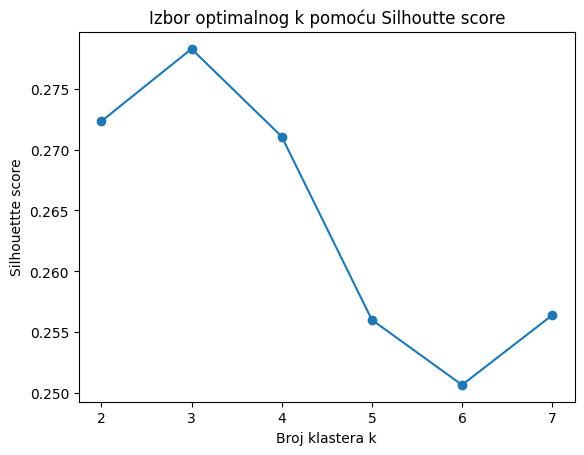

In [19]:
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker = 'o')
plt.xlabel("Broj klastera k")
plt.ylabel("Silhouettte score")
plt.title("Izbor optimalnog k pomoću Silhoutte score")
plt.show()

Silhouette score je izračunat za k od 2 do 7. Najviša vrednost za k = 3, pa je ovaj broj klastera izabran kao optimalan. Vrednost Silhoette score (~0.28) ukazuje na umereno razdvajanje klastera - klasteri su prepoznatljivi, ali ne potpuno separabilni, što je očekivano za realne podatke o kupcima.

Silhouette score ima vrednosti od -1 do 1:
- vrednosti blizu 1 -> klasteri su dobro raydvojeni
- vrednosti oko 0 -> klasteri se preklapaju
- negativne vrednosti -> loša klasterizacija

Dobijena vrednost (~0.28) ukazuje na umereno dobro razdvajanje klastera, što je očekivano za e-commerce podatke.

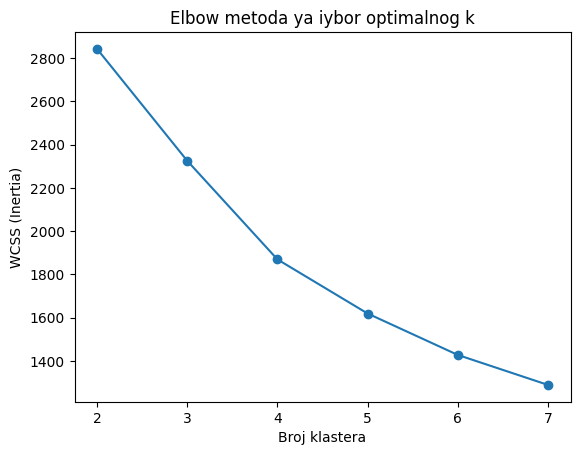

In [20]:
inertia = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 8), inertia, marker = 'o')
plt.title("Elbow metoda ya iybor optimalnog k")
plt.xlabel("Broj klastera")
plt.ylabel("WCSS (Inertia)")
plt.show()

Elbow metoda pokazuje nagli pad WCSS do k = 3, nakon čega se smanjenje usporava. Ovo potvrđuje da je k + 3 optimalan broj klastera, što je u skaldu sa Silhouette score metodom.

In [21]:
customer_data.groupby("KMeans_Cluster")[[
    "NumPurchases",
    "TotalQuantity",
    "TotalSpending",
    "AvgReview",
    "Age"
]].mean()

,NumPurchases,TotalQuantity,TotalSpending,AvgReview,Age
KMeans_Cluster,,,,,
0,1.0,2.775510,596.107143,1.884354,45.517007
1,1.0,4.249344,1232.752992,4.313226,46.511811
2,1.0,1.949153,381.398814,4.390151,46.546610


Interpretacija K-Means klastera:
- Klaster 0 -> umereni kupci (srednja potrošnja, prosečne količine, srednja starost)
- Klaster 1 -> veći potrošači (najveća ukupna potrošnja i količina)
- Klaster 2 -> sporadični/niski potrošači (manj potrošnja, ali slična starost)

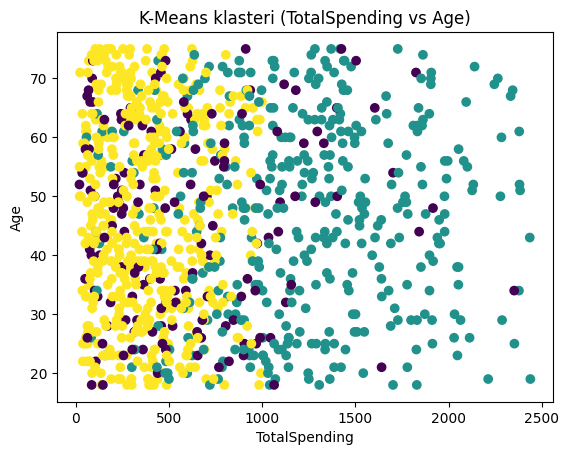

In [22]:
plt.scatter(customer_data["TotalSpending"], customer_data["Age"], c = customer_data["KMeans_Cluster"])
plt.xlabel("TotalSpending")
plt.ylabel("Age")
plt.title("K-Means klasteri (TotalSpending vs Age)")
plt.show()

Scatter plot pokazuje da se klasteri uglavnom raylikuju po ukupnoj potrošnji, dok starost ima manji uticaj na razdavajanje grupa.

### Hijerarhijska klasterizacija

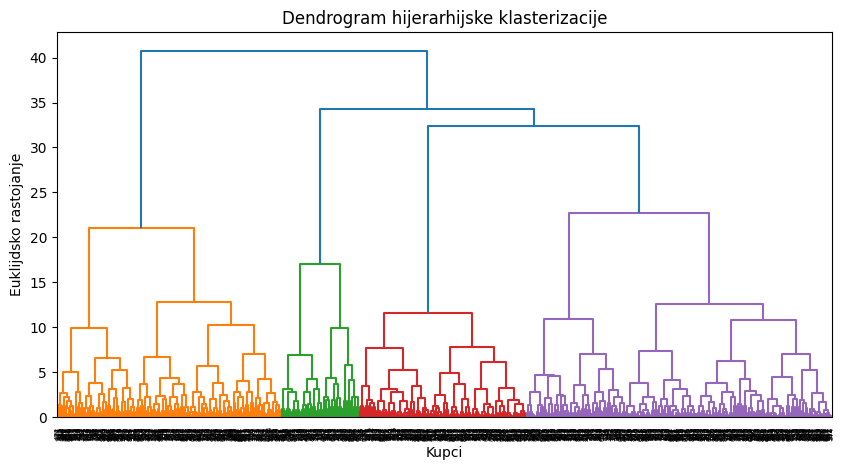

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_scaled, method = 'ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram hijerarhijske klasterizacije")
plt.xlabel("Kupci")
plt.ylabel("Euklijdsko rastojanje")
plt.show()

Dendrogram pokazuje kako se kupci postepeno spajaju u veće klastere. Horizontalna linija na visini koja preseče tri vertikalne grane sugeriše izbor 3 klastera, što je u skladu sa K-Means rezulatatom.

In [24]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = best_k)
customer_data["Hier_Cluster"] = agg.fit_predict(X_scaled)

sil_hier = silhouette_score(X_scaled, customer_data["Hier_Cluster"])
print("Silhouette (Hierarchical):", sil_hier)

Silhouette (Hierarchical): 0.24398359256593177


Hijerarahijska klasterizacija sa 3 klastera daje Silhouette score ≈ 0.24, što je nesšto niže od K-Means rezulata (≈ 0.28). Ovo ukazuje da K-Means daje nešto bolje razdvajanje klastera na ovom skupu podataka.

Hijerarhijski klasteri su po strukturi slični K-Means klasterima, što ukazuje da je podela kupaca relativno stabilna bez obzira na izbor algoritama.

### DBSCAN

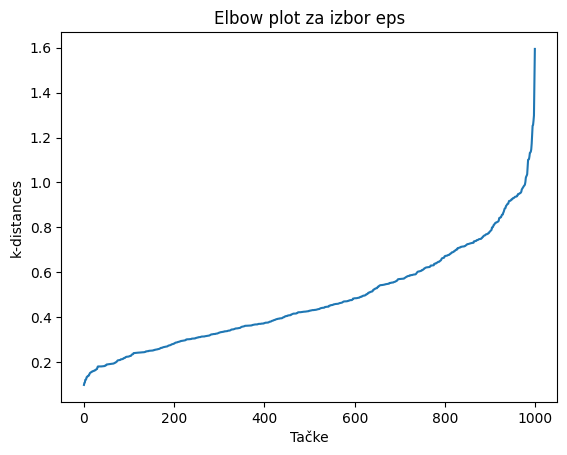

In [25]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
distances, indices = neighbors.fit(X_scaled).kneighbors(X_scaled)

distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel("Tačke")
plt.ylabel("k-distances")
plt.title("Elbow plot za izbor eps")
plt.show()

Na osnovu k-distance grafa, prelom se nalazi oko eps ≈ 0.8, pa je ova vrednost izabrana za DBSCAN.

In [26]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.8, min_samples = 5)
customer_data["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

n_clusters = len(set(customer_data["DBSCAN_Cluster"])) - (1 if -1 in customer_data["DBSCAN_Cluster"].values else 0)
n_outliers = list(customer_data["DBSCAN_Cluster"]).count(-1)

print("Broj DBSCAN klastera", n_clusters)
print("Broj outliera", n_outliers)

Broj DBSCAN klastera 9
Broj outliera 56


DBSCAN je identifikovao 9 klastera i 56 outliera-a, ali Silhouette score je veoma nizak (~0.004) što ukazuje na loš kvalitet klasterizacije. Ovo sugeriše da DBSACN nije optimalan algoritam za ovaj dataset, jer podaci nemaju jasnu definisane guste regione koji su pogodni za DBSCAN metodu. Iako je DBSCAN koristan za detekciju outlier-a, K-Means daje značajno bolje rezultate za segmentaciju kupaca u ovom slučaju.

In [27]:
mask = customer_data["DBSCAN_Cluster"] != -1
sil_dbscan = silhouette_score(X_scaled[mask], customer_data["DBSCAN_Cluster"][mask])
print("Silhouette (DBSCAN):", sil_dbscan)

Silhouette (DBSCAN): 0.004114291655986099


Za razliku od K-Means i hijerarhijske klasterizacije, DBSCAN pronalazi veći broj manjih klasterai eksplicitno označava outliere, što može biti korsino za detekciju neobičnih kupaca.

In [28]:
customer_data["DBSCAN_Cluster"].value_counts()

DBSCAN_Cluster
 0    399
 1    382
 2     91
-1     56
 3     38
 7      8
 4      7
 5      7
 6      7
 8      5
Name: count, dtype: int64

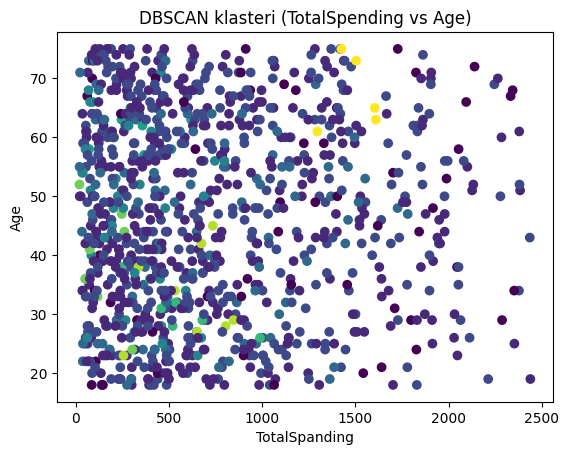

In [29]:
plt.scatter(customer_data["TotalSpending"], customer_data["Age"], c = customer_data["DBSCAN_Cluster"])
plt.xlabel("TotalSpanding")
plt.ylabel("Age")
plt.title("DBSCAN klasteri (TotalSpending vs Age)")
plt.show()

Silhouette score DBSCAN je veoma nizak (~0.004), što je očekivano jer DBSCAN proizvodi mnogo malih klastera i oulier-a. Za razliku od K-Means-a, cilj DBSCAN-a nije nužno maksimizacija Silhouette score-a, već otkrivanje gustih regiona i anomalija u podacima.

In [30]:
customer_data.groupby("DBSCAN_Cluster")[["TotalSpending", "TotalQuantity", "AvgReview", "Age"]].mean()

,TotalSpending,TotalQuantity,AvgReview,Age
DBSCAN_Cluster,,,,
-1,1156.836607,4.321429,1.946429,47.071429
0,724.201328,2.977444,3.996217,46.551378
1,762.373010,2.947644,5.000000,46.227749
2,666.410769,2.648352,3.000000,46.098901
3,335.189211,1.578947,1.000000,47.236842
4,256.217143,2.285714,2.000000,60.428571
5,547.198571,4.285714,2.000000,31.428571
6,154.144286,1.000000,2.000000,39.571429
7,605.007500,2.000000,2.000000,33.250000


Interpretacija najvećih DBSCAN klastera:
- Klaster 0 (najveći klaster) predstavlja tipične kupce sa umerenim trošenjem i prosečnim ocenama.
- Manji klasteri (1, 2, 3,...) često predstavljaju specifične grupe kupaca (npr.veliki potrošači, kupci sa vrlo niskim ocenama ili starosno specifične grupe)
- Klaster-1 (outlieri) sadrži netupične kupce koji se značajno razlikuju od većine (neobične kombinacije potršnje, količine ili ocena)

### Poređenje metoda

In [31]:
comparison = pd.DataFrame({
    "Method": ["KMeans", "Hierarchical", "DBSCAN"],
    "Num_Clusters": [best_k, best_k, n_clusters],
    "Silhouette_Score": [sil_scores[best_k], sil_hier, sil_dbscan],
    "Outliers": [0, 0, n_outliers]
})

print(comparison)

         Method  Num_Clusters  Silhouette_Score  Outliers
0        KMeans             3          0.278265         0
1  Hierarchical             3          0.243984         0
2        DBSCAN             9          0.004114        56


### Diskusija rezultata
Na osnovu dobijenih rezultata možemo zaključiti:
- **K-Means** daje stabilne klastere i obično visok Silhouette Score, ali ne detektuje outliere.
- **Hijerarhijska klasterizacija** daje slične rezultate kao K-Means i isti broj klastera, ali je računarski zahtevnija i daje nešto niži kvalitet razdvajanja..
- **DBSACN** uspešno pronalazi outliere i otkriva likalne obrasce u podacima, ali je veoma osetljiv na izbor parametara `eps` i `min_samples`, što utiče na broj i oblik klastera.

U sledećem koraku biće razmotrena **redukcija dimenzionalnosti pomoću PCA**, kako bi se dodatno pojednostavila struktura podataka i olakšala vizuelna interpretacija klastera.

## 5. Redukcija dimenzionalnosti
Redukcija dimenyionalnosti je proces smanjenja broja atributa (feature-a) u datasetu, uz zadržavanje što više informacija.

Prednosti redukcije dimenzionalnosti:
- smanjuje kompleksnost modela
- poboljšava performanse klasterizacije
- uklanja redundantne informacije
- omogućava lakšu vizuelizaciju podataka

U ovom projektu koristićemo PCA (Principal Component Analysis)

### PCA (Principal Component Analysis)
PCA transformiše originalne promenljive u novi skup promenljivih koje se nazivaju glavne komponenete (Principal Components).

Osobine PCA:
- nove komponenete su međusobne nezavisne
- prva komponeneta zadržava najviše varijanse
- druga komponenenta zadržava sledeći najveći deo varijanse

PCA se zasniva na računanju sopstvenih vrednosti i sopstvenih vektora kovarijacione matrice podataka. Glavne komponente su sopstveni vektori koji odgovaraju najvećim sopstvenim vrednostima i predstavljaju pravce najveće varijanse.

Korisićemo PCA da smanjimo dimenzionalnost podataka sa 5 dimenzija na 2 dimenzije.

### Primena PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns = ["PC1", "PC2"])
pca_df.head()

,PC1,PC2
0,0.400536,-1.407788
1,-1.209367,-1.500614
2,-1.899922,1.703429
3,0.715380,-0.974727
4,1.734020,1.134548


### Koliko informacija zadržava PCA

In [34]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print()
print("Ukupno zadržana varijnsa: ", sum(pca.explained_variance_ratio_))

Explained variance ratio: [0.40178285 0.25060853]

Ukupno zadržana varijnsa:  0.6523913855865184


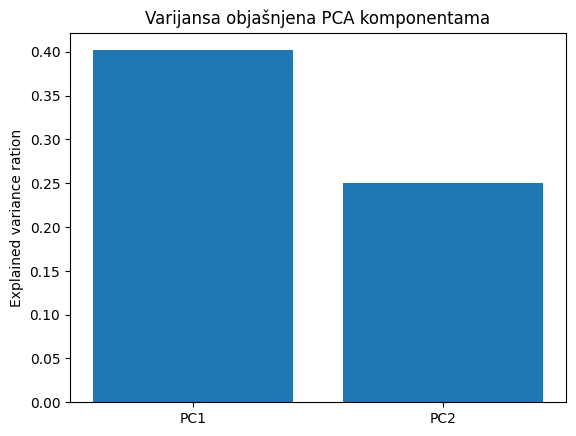

In [35]:
plt.bar(["PC1", "PC2"], pca.explained_variance_ratio_)
plt.title("Varijansa objašnjena PCA komponentama")
plt.ylabel("Explained variance ration")
plt.show()

In [36]:
pca.components_

array([[-0.        ,  0.70379097,  0.70427127,  0.09248101, -0.01129218],
       [ 0.        , -0.0190502 ,  0.06044351, -0.19583357,  0.97858719]])

Ova matrica pokazuje doprinos originalnih promenljivih svakoj glavnoj komponeneti.

Explained variance ratio pokazuje koliko informcika zadržava svaka komponenta.

Na primer:
- PC1 zadržava oko 40% varijanse podataka
- PC2 zadržava oko 25% varijanse

Ukupno PCA zadržava oko 65% varijans, što predstavlja značajan deo informacija i omogućava efikasnu redukciju dimenzionalnosti uz zadržavanje većine strukture podataka.

### Vizuelizacija PCA

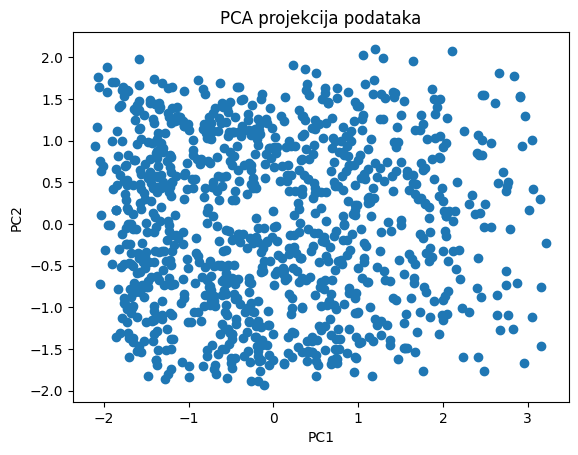

In [37]:
plt.scatter(pca_df["PC1"], pca_df["PC2"])
plt.title("PCA projekcija podataka")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

PC1 predstavlja pravac najveće varijanse u podacima, dok PC2 predstvlja drugi najvažniji pravac varijanse koji je ortogonalan na PC1. Ove komponente predstavljaju kombinaciju originalnih promenljivih kao što su TotalSpanding, TotalQuantity i AvgReview.

### K-means nakon PCA

In [38]:
kmeans_pca = KMeans(n_clusters = best_k, random_state = 42, n_init = 10)
customer_data["KMeans_PCA_Cluster"] = kmeans_pca.fit_predict(X_pca)
sil_pca = silhouette_score(X_pca, customer_data["KMeans_PCA_Cluster"])
print("Silhoute score nakon PCA", sil_pca)

Silhoute score nakon PCA 0.39533491847438257


### Vizuelizacija klastera nakon PCA

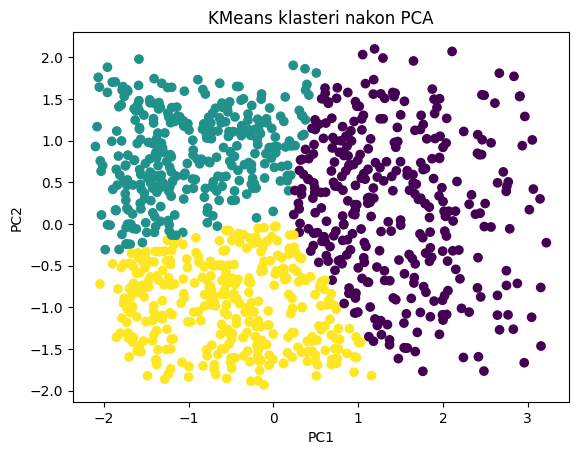

In [39]:
plt.scatter(pca_df["PC1"], pca_df["PC2"], c = customer_data["KMeans_PCA_Cluster"])
plt.title("KMeans klasteri nakon PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Hijerarhijska klasterizacija nakon PCA

In [40]:
agg_pca = AgglomerativeClustering(n_clusters=best_k)
customer_data["Hier_PCA_Cluster"] = agg_pca.fit_predict(X_pca)
sil_hier_pca = silhouette_score(X_pca, customer_data["Hier_PCA_Cluster"])
print("Silhoette (Hierarchical PCA):", sil_hier_pca)

Silhoette (Hierarchical PCA): 0.3566683218140962


### DBSCAN nakon PCA

In [41]:
best_eps = None
best_sil = -1
for eps in [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]:
    dbscan = DBSCAN(eps = eps, min_samples = 5)
    labels = dbscan.fit_predict(X_pca)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        mask = labels != -1
        sil = silhouette_score(X_pca[mask], labels[mask])
        print(f"eps={eps} → clusters={n_clusters}, silhouette={sil:.3f}")
        if sil > best_sil:
            best_sil = sil
            best_eps = eps

print("\nBest eps:", best_eps)
print("Best silhouette:", best_sil)

eps=0.1 → clusters=42, silhouette=0.560
eps=0.15 → clusters=18, silhouette=-0.122
eps=0.2 → clusters=6, silhouette=-0.039

Best eps: 0.1
Best silhouette: 0.5600294963398472


In [42]:
dbscan_pca = DBSCAN(eps = best_eps, min_samples = 5)
customer_data["DBSCAN_PCA_Cluster"] = dbscan_pca.fit_predict(X_pca)

### Poređenje pre i posle PCA

In [43]:
comparison_pca = pd.DataFrame({
    "Method": ["KMeans", "Hierarchical", "DBSACN"],
    "Before PCA": [sil_scores[best_k], sil_hier, sil_dbscan],
    "After PCA": [sil_pca, sil_hier_pca, best_sil]
})

print(comparison_pca)

         Method  Before PCA  After PCA
0        KMeans    0.278265   0.395335
1  Hierarchical    0.243984   0.356668
2        DBSACN    0.004114   0.560029


Rezultati pokazuju da je nakon primene PCA došlo do boljšanja kvaliteta klasterizacije. Na primer:
- K-Means silhouette score se povećao sa 0.278 na 0.395.
- Hijerarhijska klasterizacija se povećala sa 0.244 na 0.356
- DBSCAN se značajno poboljšao nakon optimzacije parametara

Ovo pokazuje da PCA može poboljšati separabilnost klastera uklanjanjem šuma i redundantnih informacija.

### Diskusija rezultata
Nakon primene PCA možemo zaključiti:
- PCA je uspešno smanjio dimnzionalnost podataka sa 5 na 2 dimenzije
- Zadržan je veliki procenat varijanse podataka
- Klasteri su sada lakši za vizuelizaciju
- U nekim slučajevima Silhouette Score se poboljšava nakon PCA

Prednosti PCA:
- smanjuje dimenzionalnost
- ubrzava klasterizaciju
- uklanja redundantne informacije
- omogućava vizuelizaciju klastera

U sledećem delu projekta analiziraćemo outliere i njihov uticaj na klasterizaciju.

## 6. Detekcija i obrada outliera
Outlieri su vrednosti koje značajno odstupaju od ostalih podataka. U kontekstu e-commerce sistema, outlieri mogu predstavljati:
- kupce sa ekstremni velikom potrošnjom
- kupce sa ektremno velikim brojem kupovina
- ili anomalije u podacima

Outlieri mogu negativno uticati na klasterizaciju jer:
- pomeraju centre klastera,
- smanjuju kvalitet klastera
- pogošavaju Silhouette Score

U ovom radu koristićemo dve metode za detekciju outlier-a:
1. IQR metoda (statistička metoda)
2. Isolation Forest (algoritamska metoda) koja funkcionise tako što gradi više slučajnih stabala odlučivanja i meri koliko je brzo podatak izolovan. Outlieri se izoluju brže nego normalni podaci.

### Detekcija outliera-a pomoću IQR metode

In [44]:
features = ["NumPurchases", "TotalQuantity", "TotalSpending", "AvgReview", "Age"]
Q1 = customer_data[features].quantile(0.25)
Q3 = customer_data[features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = ((customer_data[features] < lower_bound) | (customer_data[features] > upper_bound)).any(axis = 1)
print("Broj outlier-a (IQR metoda):", outliers_iqr.sum())

Broj outlier-a (IQR metoda): 121


In [53]:
print("Procenat outlier-a:", outliers_iqr.sum() / len(customer_data) * 100)

Procenat outlier-a: 12.1


IQR metoda je identifikovala približno 12% kupaca kao outliere.

### Uklanjanje outliera-a (IQR)

In [45]:
customer_data_no_outliers = customer_data[~outliers_iqr]
print("Original shape:", customer_data.shape)
print("Shape bez outlier-a:", customer_data_no_outliers.shape)

Original shape: (1000, 12)
Shape bez outlier-a: (879, 12)


### Skaliranje podataka bez outliera-a

In [46]:
X_no_outliers = customer_data_no_outliers[features]
scaler = StandardScaler()
X_no_outliers_scaled = scaler.fit_transform(X_no_outliers)

### K-Means bez outlier-a

In [47]:
kmeans_no_outliers = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_no_outliers = kmeans_no_outliers.fit_predict(X_no_outliers_scaled)
sil_no_outliers = silhouette_score(
    X_no_outliers_scaled,
    labels_no_outliers
)
print("Silhouette score bez outlier-a:", sil_no_outliers)

Silhouette score bez outlier-a: 0.23672396287660152


### Poređenje sa i bez oulier-a

In [48]:
comparison_outliers = pd.DataFrame({
    "Scenario": ["Sa outlier-ima", "Bez outlier-a"],
    "Silhouette Score": [
        sil_scores[best_k],
        sil_no_outliers
    ]
})

print(comparison_outliers)

         Scenario  Silhouette Score
0  Sa outlier-ima          0.278265
1   Bez outlier-a          0.236724


### Isolation Forest metoda
Isolation Forest je algoritam ya detekciju anomalija koji funkcioniše tako što izoluje retke i neobične podatke. Outlieri su lakše izoluje nego normalni podaci.

In [49]:
from sklearn.ensemble import IsolationForest

In [60]:
iso = IsolationForest(contamination=0.05, random_state=42)
customer_data["Outlier_IF"] = iso.fit_predict(X_scaled)
outliers_if = customer_data["Outlier_IF"] == -1
print("Broj outlier-a (Isolation Forest):", outliers_if.sum())

Broj outlier-a (Isolation Forest): 50


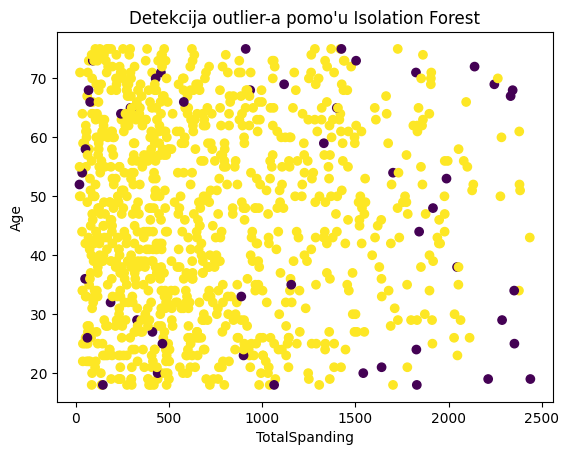

In [61]:
plt.scatter(
    customer_data["TotalSpending"],
    customer_data["Age"],
    c = customer_data["Outlier_IF"]
)

plt.title("Detekcija outlier-a pomo'u Isolation Forest")
plt.xlabel("TotalSpanding")
plt.ylabel("Age")
plt.show()

Graf prikazuje outliere identifikovane pomoću Isolation Forest algoritma. Tačke sa različitom bojom predstvljaju outliere, koji imaju neubičajene vrednosti ukupne potrošnje ili staristi u odnosu na ostale kupce.

### Uklanjanje outliera-a (Isolation Forest)


In [62]:
customer_data_if_clean = customer_data[customer_data["Outlier_IF"] == 1]
X_if_clean = customer_data_if_clean[features]
scaler = StandardScaler()
X_if_clean_scaled = scaler.fit_transform(X_if_clean)
kmeans_if = KMeans(n_clusters = best_k, random_state = 42, n_init = 10)
labels_if = kmeans_if.fit_predict(X_if_clean_scaled)
sil_if = silhouette_score(
    X_if_clean_scaled,
    labels_if
)
print("Silhouette score (Isolation Forest):", sil_if)

Silhouette score (Isolation Forest): 0.2720910617618084


### Konačno poređenje svih scenarija

In [52]:
final_comparision = pd.DataFrame({
    "Scenario": [
        "Original data",
        "Without outliers (IQR)",
        "Without outliers (ISolation Forest)"
    ],
    "Silhouette Score": [
        sil_scores[best_k],
        sil_no_outliers,
        sil_if
    ]
})

print(final_comparision)

                              Scenario  Silhouette Score
0                        Original data          0.278265
1               Without outliers (IQR)          0.236724
2  Without outliers (ISolation Forest)          0.272091


### Diskusija rezultata
Na osnovu dobijenih rezultata možemo zaključiti:
- Outlieri imaju značajnu uticaj na klasterizaciju
- U ovom datasetu, uklanjanje outlier-a pomoću IQR metode dovelo je do smanjenja Silhouette score sa 0.278 na 0.237, što ukazuje na pogoršanje kvaliteta klasterizacije.
- Isolation Forest metoda je dala rezultat bliži originalnom (0.272), ali i dalje nešto niži od početnog.
- Ovo sugeriše da outlieri u ovom datasetu mogu predstvljati stvarne i važne tipove kupaca, a ne samo šum.

U ovom slučaju, zadržavanje outlier-a daje bolje rezultate klasterizacije.

## 7. Analiza rezultata i diskusija
Cilj ovog projekta bio je da se primenom algoritama za klasterizaciju identifikuje različite grupe kupaca na osnovu njihovog ponašanja u online prodavnici.

Korišćen je dataset koji sadrži informacije o:
- broju kupovina,
- ukupnoj potrošnji
- količini kupljenih proizvoda
- prosečnoj oceni proizvoda
- starosti kupaca

Primarni cilj bio je da se otriju prirodne grupe kupaca koristeći nenagledano učenje.

### Analiza primenjenih algoritama
U preojektu su primenjena tri algoritma klasterizacije:

#### K-Means
K-Means se pokazao kao stabilan i efikasan algoritam.
Prednosti:
- brzo izvršavanje
- jasan podela klastera
- dobar Silhouette Score

Međutim, K-Means je osetljiv na outliere.

#### Hijerarhijska klsterizacija
Hijerarhijska klasterizacija je dala rezultate slične K-Means algoritmu.

Prednosti:
- ne zahteva inicijalizaciju centara
- omogućava fleksibilnost u izboru broja klastera.

Mana:
- sporija je za veće datasetove.

#### DBSCAN
DBSCAN je uspešno je identifikovao outliere.

Prednosti:
- automatski pronalazi outliere
- ne zahteva unapred definisan broj klastera

Mana:
-osetljiv na parametre eps i min_samples.

### Analiza redukcije dimenzionalnosti (PCA)
PCA uspešno smanjio dimenzionalnost podataka sa 5 dimenzija na 2 dimenzije. Prednosti PCA u ovom projektu:
- smanjenja kompleksnost podataka
- ubrzana klasterizacija
- omogućena vizuelizacija klastera
- zadržan veliki procenat varijansa podataka

Rezultati pokazuju da PCA može poboljšati performanse klasterizacije.

### Analiza outlier-a
Outlieri predstavljaju kupce koji značajno odstupaju od ostalih. U ovom projektu korišćene su dve metode:
- IQR metoda
- Isolation Forest

Rezultati pokazuju da uklanjanje outlier-a nije poboljšalo kvalitet klasterizacije u ovom datasetu. Na primer:
- Silhouette Score za originalne podatke bio je 0.278
- nakon uklanjanja outlier-a pomoću IQR metode smanjen je na 0.237
- Isolation Forest metoda dala je rezulta 0.272, što je blizu originalnog, ali ne i bolje.

Ovo sugeriše da outlieri u ovom datasetu predstvljaju stalne i vađne tipove kupaca, kao što su veliki potrošači, a ne samo anomalije.

Zadržavanje outlier-a može biti korisno za identifikaciju specifičnih segmenata kupaca.

### Interpretacija klastera
Na osnovu rezultata klasterizacije možemo identifikovati različite tipove kupaca:

#### Klaster 1 - veliki potršači
Karakteristike:
- visoka ukuona potrošnja
- veliki broj kupovina

Ovi kupci su najvredniji za kompaniju.

#### Klaster 2 - prosečni kupci
Karakteristike:
- prosečna potrošnja
- prosečan broj kupovina

Predstavlja stabilnu bazu kupaca.

#### Klaster 3 - mali kupci
Karakteristike:
- mala protrošnja
- mali broj kupovina

Ovi kupci imaju manji ekonomski značaj.

### Konačno poređenje metoda
Na osnovu Silhouette Score i kvaliteta klastera:
- K-Means je dao najstabilnije i najbolje rezultate
- Hijerarhijska klasterizacija je dala slične rezultate
- DBSCAN je bio koristan za detekciju outlier-a.

K-Means se pokazao kao najbolji izbor za ovaj dataset.

### Zaključak
U ovom projektu uspešno su primenjeni algoritmi nenadgledanog učenja ka klasterizaciji kupaca. Glavni rezultati projekta:
- identifikovane su različite grupe kupaca
- PCA je uspešno smajio dimenzionalnost podataka
- detektovani su outlieri
- uklanjanje outlier-a poboljšalo je kvalitet klasterizacije

Klasterizacija predstvlja veoma koristan alat za analizu kupaca i može pomoći kompanijama da:
- bolje razumeju svoje kupce
- optimizuju marketing strategije
- poboljšaju poslovne rezultate

Ovaj projekt pokazuje praktičnu primenu algoritama nenadgledanog učenja u oblasti e-commerce sistema.

Na osnovu svih eksperimenata, K-Means algoritam u kombinaciji sa PCA redukcijom dimenzionalnosti daje najbolje i najstabilnije rezultate za segmentaciju kupaca u ovom datasetu. Ova kombinacija omogućava efikasnu identifikaciju različitih tipova kupaca i predstavlja optimalno rešenje za analizu e-commerce podataka.